In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import matplotlib as mpl
from scipy.interpolate import griddata 
import warnings
import os
import datetime as dt
import numpy as np
sys.path.append('C:/Users/shjo/Bridge/JNUpack/mySO_src/libs/')
warnings.filterwarnings('ignore')
from myTools import myInfo
from myTrend import myfitting2d_sttcs,myRegress3d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib as mpl
# mpl.use('agg')

### ======================================================================
pthMO='J:/tmp_proc/Models/'
pthrn='J:/tmp_proc/Obs/'

varnm='temp'
myindx='SAM'


t_rng=['1993-01', '2017-12']

# wpth='C:/Users/shjo/OneDrive/mySO/WCseason/'+myindx+'/'
mySig_npth='C:/Users/shjo/OneDrive/mySO/mySignals/my'+myindx+'.pkl'



In [2]:
with open('C:/Users/shjo/OneDrive/mySO/mySignals/mySAM.pkl', 'rb') as f:
    data = pickle.load(f)
mySAM=data.loc[t_rng[0]:t_rng[-1]]
with open('C:/Users/shjo/OneDrive/mySO/mySignals/myMEI.pkl', 'rb') as f:
    data = pickle.load(f)
myMEI=data.loc[t_rng[0]:t_rng[-1]]
with open('C:/Users/shjo/OneDrive/mySO/mySignals/mySOI.pkl', 'rb') as f:
    data = pickle.load(f)
mySOI=data.loc[t_rng[0]:t_rng[-1]]

mySAM=(mySAM-mySAM.mean())/mySAM.std()
myMEI=(myMEI-myMEI.mean())/myMEI.std()
mySOI=-(mySOI-mySOI.mean())/mySOI.std()

print('!!! Index --> Normalized !!!')


!!! Index --> Normalized !!!


In [3]:
myTime=myMEI.resample('1Y').mean().index.values

In [4]:
mySAM_Cld=mySAM[ (mySAM.index.month==3)|(mySAM.index.month==4)|(mySAM.index.month==5)|\
    (mySAM.index.month==6)|(mySAM.index.month==7)|(mySAM.index.month==8)].resample('1Y').mean().values.reshape(-1)
mySAM_Wrm=mySAM[ (mySAM.index.month==10)|(mySAM.index.month==11)|(mySAM.index.month==12)|\
    (mySAM.index.month==1)|(mySAM.index.month==2)][2:]
mySAM_Wrm=np.array([mySAM_Wrm[myindx][5*n:5*n+5].mean() for n in range(int(len(mySAM_Wrm)/5))])


In [5]:
myMEI_Cld=myMEI[ (myMEI.index.month==3)|(myMEI.index.month==4)|(myMEI.index.month==5)|\
    (myMEI.index.month==6)|(myMEI.index.month==7)|(myMEI.index.month==8)].resample('1Y').mean().values.reshape(-1)
myMEI_Wrm=myMEI[ (myMEI.index.month==10)|(myMEI.index.month==11)|(myMEI.index.month==12)|\
    (myMEI.index.month==1)|(myMEI.index.month==2)][2:]
myMEI_Wrm=np.array([myMEI_Wrm['MEIv2'][5*n:5*n+5].mean() for n in range(int(len(myMEI_Wrm)/5))])


In [6]:
mySOI_Cld=mySOI[ (mySOI.index.month==3)|(mySOI.index.month==4)|(mySOI.index.month==5)|\
    (mySOI.index.month==6)|(mySOI.index.month==7)|(mySOI.index.month==8)].resample('1Y').mean().values.reshape(-1)
mySOI_Wrm=mySOI[ (mySOI.index.month==10)|(mySOI.index.month==11)|(mySOI.index.month==12)|\
    (mySOI.index.month==1)|(mySOI.index.month==2)][2:]
mySOI_Wrm=np.array([mySOI_Wrm['SOI'][5*n:5*n+5].mean() for n in range(int(len(mySOI_Wrm)/5))])


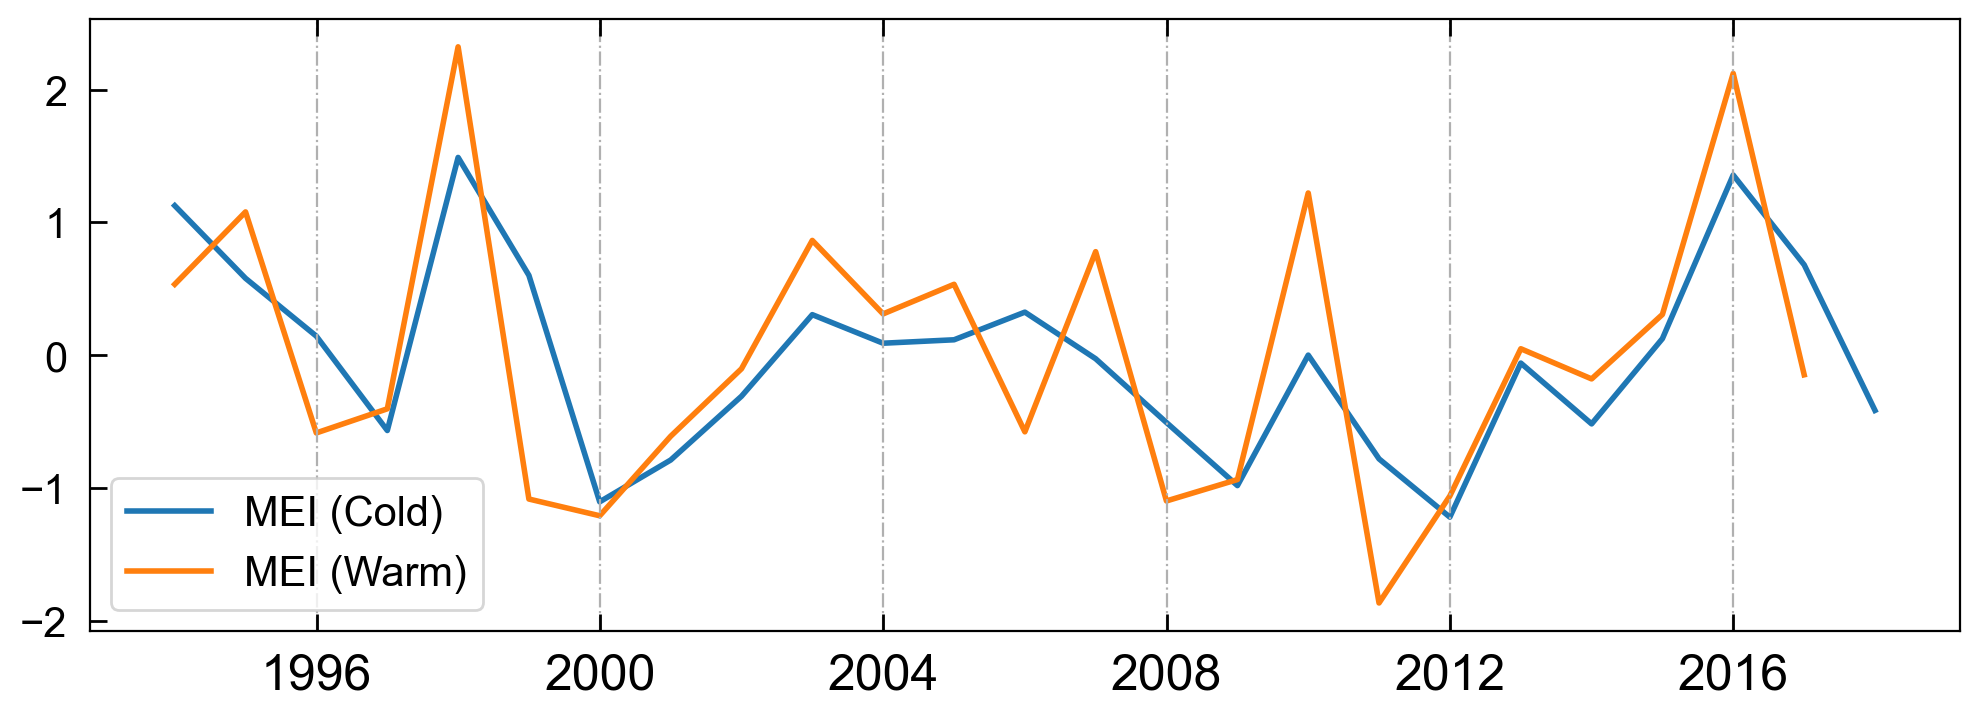

In [7]:
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(myTime,myMEI_Cld, label='MEI (Cold)',color='C0',linewidth=2,zorder=0)
f2 = axs.plot(myTime[:-1],myMEI_Wrm, label='MEI (Warm)',color='C1',linewidth=2,zorder=0)
# axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
# xtick_location = time[5::12*4]
# xtick_labels = t_label[5::12*4]
# axs.set_xticks(ticks=xtick_location)
# axs.set_xticklabels( rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
plt.legend(fontsize=Label_size-3)
if 0:
    # plt.savefig(wnpth'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(self.wpth+'/'+save_name,bbox_inches='tight')
plt.show()

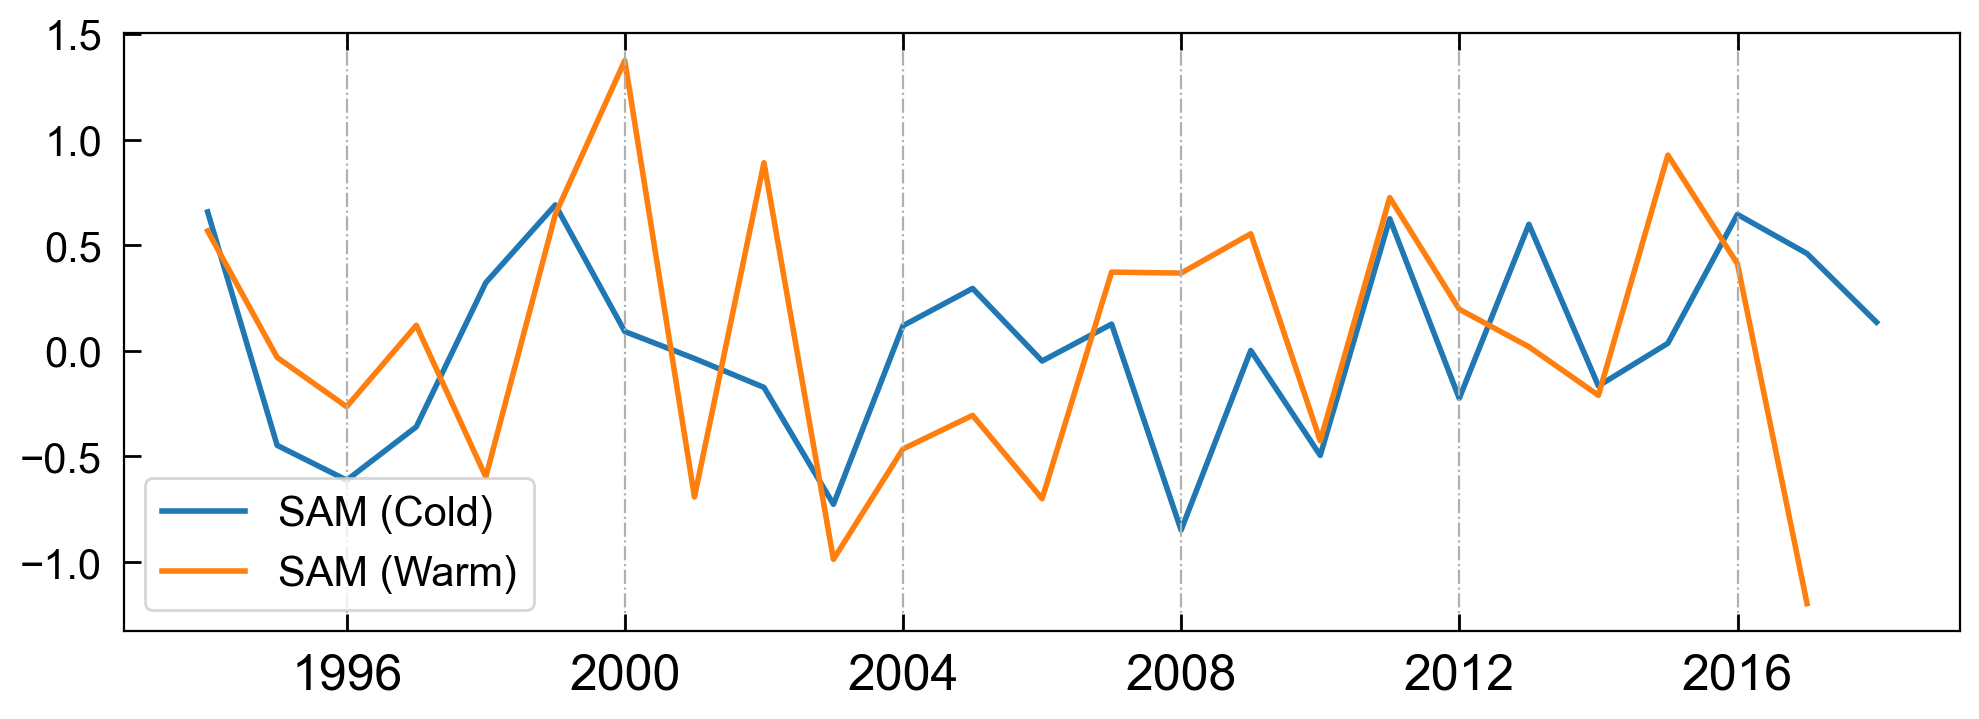

In [8]:
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(myTime,mySAM_Cld, label='SAM (Cold)',color='C0',linewidth=2,zorder=0)
f2 = axs.plot(myTime[:-1],mySAM_Wrm, label='SAM (Warm)',color='C1',linewidth=2,zorder=0)
# axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
# xtick_location = time[5::12*4]
# xtick_labels = t_label[5::12*4]
# axs.set_xticks(ticks=xtick_location)
# axs.set_xticklabels( rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
plt.legend(fontsize=Label_size-3,loc='lower left')
if 0:
    # plt.savefig(wnpth'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(self.wpth+'/'+save_name,bbox_inches='tight')
plt.show()

In [9]:
np.corrcoef([mySAM_Cld,mySOI_Cld])

array([[1.        , 0.14241537],
       [0.14241537, 1.        ]])

In [10]:
np.corrcoef([mySAM_Cld,myMEI_Cld])

array([[1.        , 0.34274138],
       [0.34274138, 1.        ]])

In [11]:
np.corrcoef([mySAM_Wrm,mySOI_Wrm])

array([[ 1.        , -0.33783883],
       [-0.33783883,  1.        ]])

In [12]:
np.corrcoef([mySAM_Wrm,myMEI_Wrm])

array([[ 1.        , -0.32614217],
       [-0.32614217,  1.        ]])

In [13]:
np.corrcoef([myMEI_Wrm,mySOI_Wrm])

array([[1.        , 0.95651148],
       [0.95651148, 1.        ]])

In [14]:
np.corrcoef([myMEI_Cld,mySOI_Cld])

array([[1.        , 0.89451032],
       [0.89451032, 1.        ]])

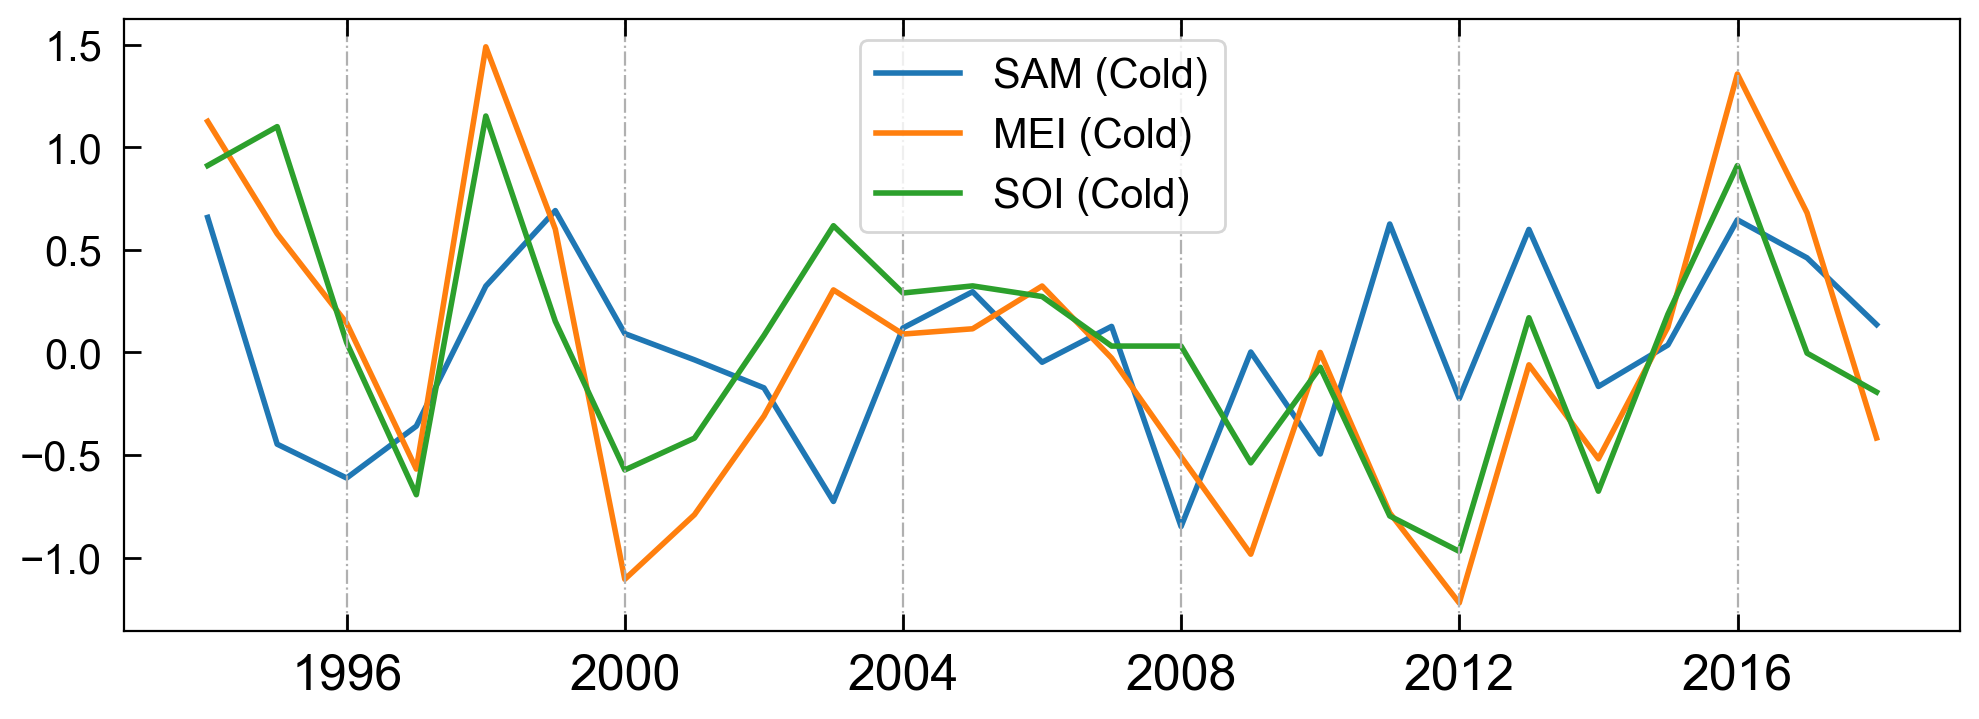

In [19]:
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(myTime,mySAM_Cld, label='SAM (Cold)',color='C0',linewidth=2,zorder=0)
f2 = axs.plot(myTime,myMEI_Cld, label='MEI (Cold)',color='C1',linewidth=2,zorder=0)
f3 = axs.plot(myTime,mySOI_Cld, label='SOI (Cold)',color='C2',linewidth=2,zorder=0)

# axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
# xtick_location = time[5::12*4]
# xtick_labels = t_label[5::12*4]
# axs.set_xticks(ticks=xtick_location)
# axs.set_xticklabels( rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
plt.legend(fontsize=Label_size-3)
if 0:
    # plt.savefig(wnpth'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(self.wpth+'/'+save_name,bbox_inches='tight')
plt.show()

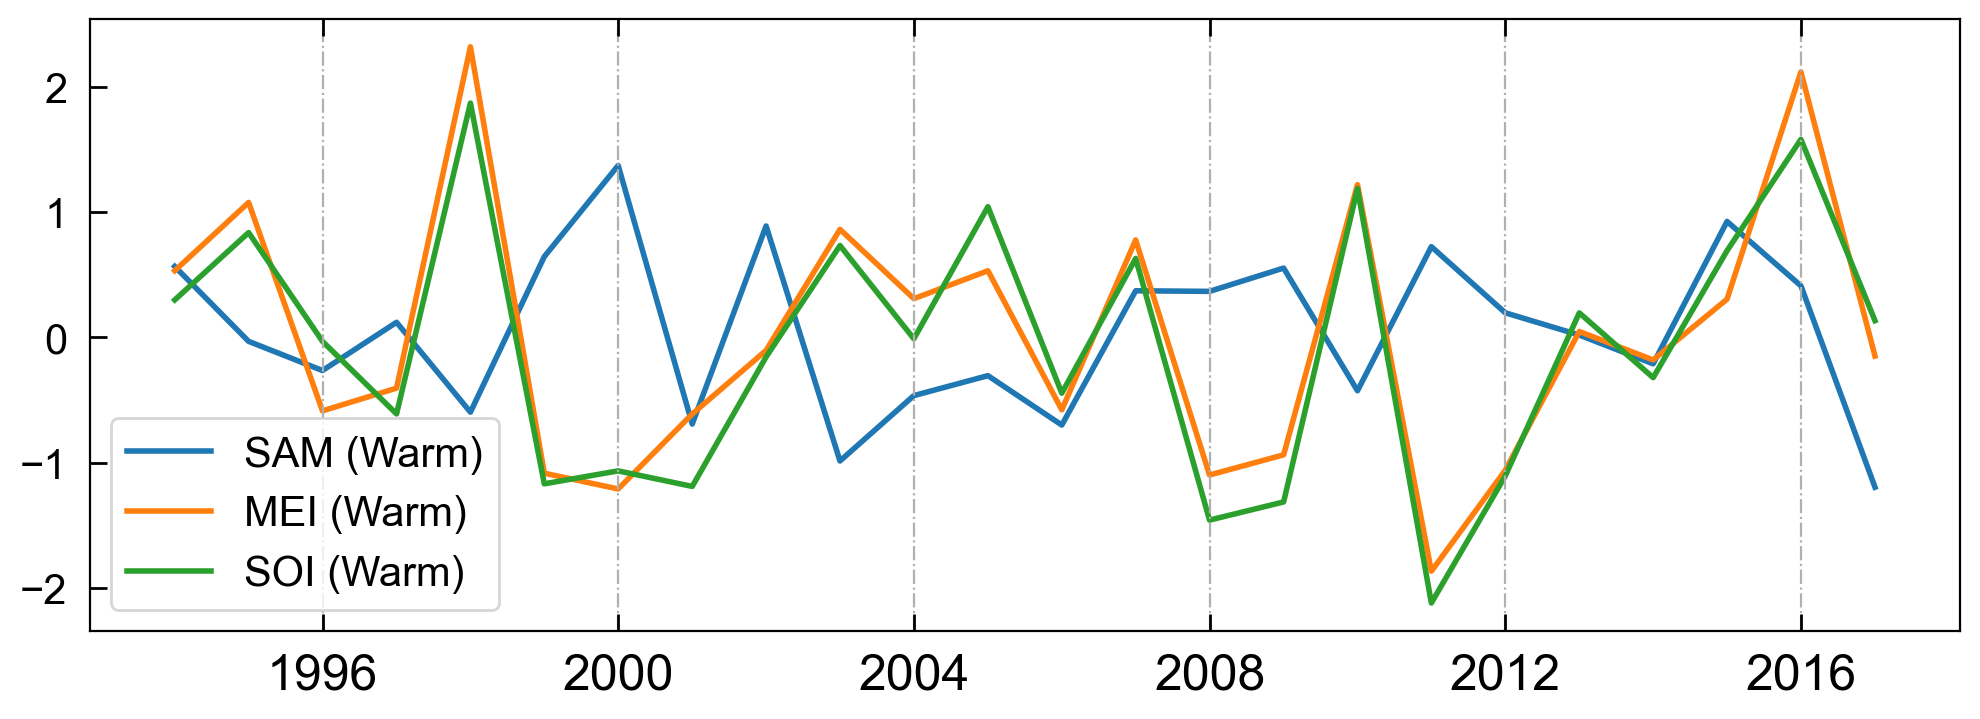

In [20]:
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(myTime[:-1],mySAM_Wrm, label='SAM (Warm)',color='C0',linewidth=2,zorder=0)
f2 = axs.plot(myTime[:-1],myMEI_Wrm, label='MEI (Warm)',color='C1',linewidth=2,zorder=0)
f3 = axs.plot(myTime[:-1],mySOI_Wrm, label='SOI (Warm)',color='C2',linewidth=2,zorder=0)

# axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
# xtick_location = time[5::12*4]
# xtick_labels = t_label[5::12*4]
# axs.set_xticks(ticks=xtick_location)
# axs.set_xticklabels( rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
plt.legend(fontsize=Label_size-3)
if 0:
    # plt.savefig(wnpth'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(self.wpth+'/'+save_name,bbox_inches='tight')
plt.show()